In [3]:
import os
os.chdir("/home/tmp_user/scikit-learn_bench/")

In [54]:
ls |grep log

16_1.log
16_2.log
16_3.log
1.log
2.log
3.log
64_1.log
64_2.log
64_3.log
64t_1.log
64t_2.log
64t_3.log
64t_4.log
64t_5.log
64t_6.log
64t_7.log


In [49]:
from curses.ascii import isdigit
from signal import valid_signals


logs = ["64t_7.log", "64t_6.log","64t_5.log","64t_4.log", "64t_3.log","64t_2.log","64t_1.log"]


def get_result_dict(file_name):
    result_dict ={}
    with open(file_name) as f:
        lines = f.readlines()
        for line in lines:
            line = line.strip()
            if line[0].isalpha():
                key = line
            elif line[0].isdigit():
                value = line
                result_dict[key] = value
    return result_dict

results = list()
for log in logs:
    results.append(get_result_dict(log))

results

[{'using': '63',
  'dur_sample_median': '107036',
  'dur_reduce_median': '29484',
  'dur_sample_index': '2291',
  'dur_reduce_index': '442404',
  'dur_select_dimension': '54092',
  'dur_parallel_median': '1979035',
  'dur_parallel_index': '1067029',
  'buildFirstPartOfKDTree': '3417074',
  'dur_thread_second': '6707182',
  'dur_reduce_second': '150',
  'buildSecondPartOfKDTree': '6707498',
  'start rearrange()reaaragePoints': '1936311',
  'compute()': '12486397',
  'duration': '39550191.87927246',
  'bigdata/synthetic-classification-10-X': '250000x16_256_tile.npy'},
 {'using': '54',
  'dur_sample_median': '104870',
  'dur_reduce_median': '23096',
  'dur_sample_index': '1876',
  'dur_reduce_index': '445990',
  'dur_select_dimension': '50489',
  'dur_parallel_median': '1995131',
  'dur_parallel_index': '1073770',
  'buildFirstPartOfKDTree': '3436943',
  'dur_thread_second': '6561334',
  'dur_reduce_second': '203',
  'buildSecondPartOfKDTree': '6561691',
  'start rearrange()reaaragePoints

In [85]:
logs_sep_rep = ["9_tune_sep_rep.log", "18_tune_sep_rep.log","27_tune_sep_rep.log","36_tune_sep_rep.log","45_tune_sep_rep.log","54_tune_sep_rep.log","63_tune_sep_rep.log","72_tune_sep_rep.log"]
results_sep_rep = list()
for log in logs_sep_rep:
    results_sep_rep.append(get_result_dict(log))


In [99]:
files_5 = [file for file in os.listdir(os.getcwd()) if "sep_5_rep" in file]
results_sep_5 = list()
for log in files_5:
    results_sep_5.append(get_result_dict(log))

In [100]:
files_5 = [file for file in os.listdir(os.getcwd()) if "sep_10_rep" in file]
results_sep_10 = list()
for log in files_5:
    results_sep_10.append(get_result_dict(log))

In [116]:
files_3 = [file for file in os.listdir(os.getcwd()) if "sep_3_rep" in file]
results_sep_3 = list()
for log in files_3:
    results_sep_3.append(get_result_dict(log))

In [102]:
logs_sep = ["9_tune_sep.log", "18_tune_sep.log","27_tune_sep.log","36_tune_sep.log","45_tune_sep.log","54_tune_sep.log","63_tune_sep.log","72_tune_sep.log"]
results_sep_1 = list()
for log in logs_sep:
    results_sep_1.append(get_result_dict(log))



In [111]:
from distutils import core
import matplotlib.pyplot as plt
import numpy as np

def visualize_scaling(key_time, results, label, core_key="using", title=""):
    cores = []
    time = []
    for result in results:
        cores.append(int(result[core_key]))
        time.append(float(result[key_time]))

    plt.scatter(cores, np.array(time)/1000000, label=label)
    plt.xlabel("cores")
    plt.ylabel("time comsuption")
    plt.legend()
    plt.title( title + " " + key)

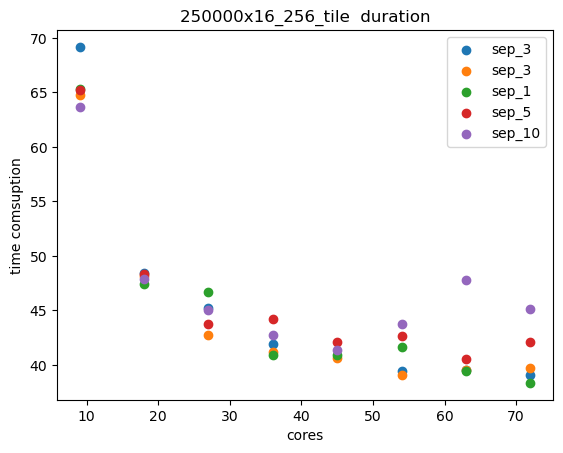

In [117]:


key = "duration"

visualize_scaling(key, results, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_3, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_1, label="sep_1", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_5, label="sep_5", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_10, label="sep_10", title="250000x16_256_tile ")

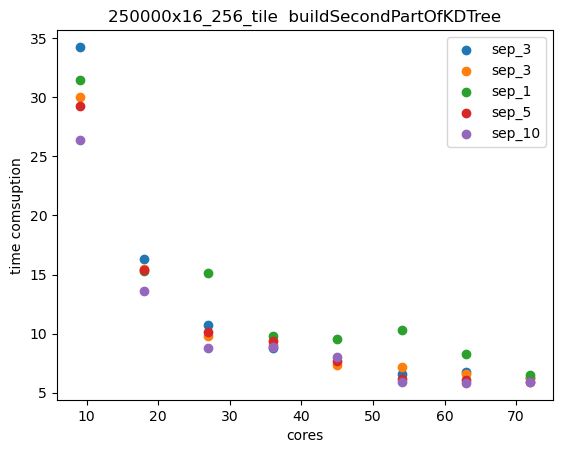

In [118]:
from distutils import core
import matplotlib.pyplot as plt
import numpy as np

key = "buildSecondPartOfKDTree"

visualize_scaling(key, results, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_3, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_1, label="sep_1", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_5, label="sep_5", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_10, label="sep_10", title="250000x16_256_tile ")

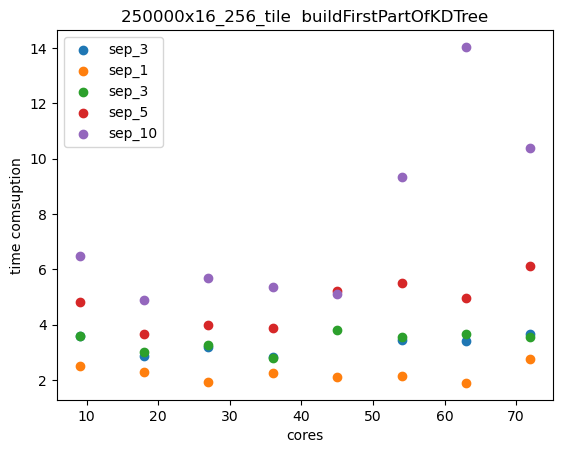

In [119]:
key = "buildFirstPartOfKDTree"

visualize_scaling(key, results, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_1, label="sep_1", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_3, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_5, label="sep_5", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_10, label="sep_10", title="250000x16_256_tile ")

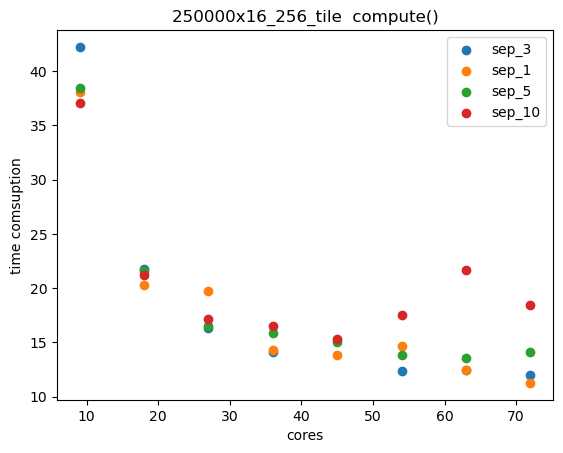

In [114]:
from distutils import core
import matplotlib.pyplot as plt
import numpy as np

key = "compute()"

visualize_scaling(key, results, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_1, label="sep_1", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_3, label="sep_3", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_5, label="sep_5", title="250000x16_256_tile ")
visualize_scaling(key, results_sep_10, label="sep_10", title="250000x16_256_tile ")

In [76]:
logs_sep_1_250K = ["9_tune_sep_1_250K.log", "18_tune_sep_1_250K.log","27_tune_sep_1_250K.log","36_tune_sep_1_250K.log","45_tune_sep_1_250K.log","54_tune_sep_1_250K.log","63_tune_sep_1_250K.log","72_tune_sep_1_250K.log"]
results_sep_1_250K = list()
for log in logs_sep_1_250K:
    results_sep_1_250K.append(get_result_dict(log))


In [77]:
logs_sep_3_250K = ["9_tune_sep_3_250K.log", "18_tune_sep_3_250K.log","27_tune_sep_3_250K.log","36_tune_sep_3_250K.log","45_tune_sep_3_250K.log","54_tune_sep_3_250K.log","63_tune_sep_3_250K.log","72_tune_sep_3_250K.log"]
results_sep_3_250K = list()
for log in logs_sep_3_250K:
    results_sep_3_250K.append(get_result_dict(log))

In [78]:
logs_sep_3_250K_rep = ["9_tune_sep_3_250K_rep.log", "18_tune_sep_3_250K_rep.log","27_tune_sep_3_250K_rep.log","36_tune_sep_3_250K_rep.log",
                       "45_tune_sep_3_250K_rep.log","54_tune_sep_3_250K_rep.log","63_tune_sep_3_250K_rep.log","72_tune_sep_3_250K_rep.log"]
results_sep_3_250K_rep = list()
for log in logs_sep_3_250K_rep:
    results_sep_3_250K_rep.append(get_result_dict(log))

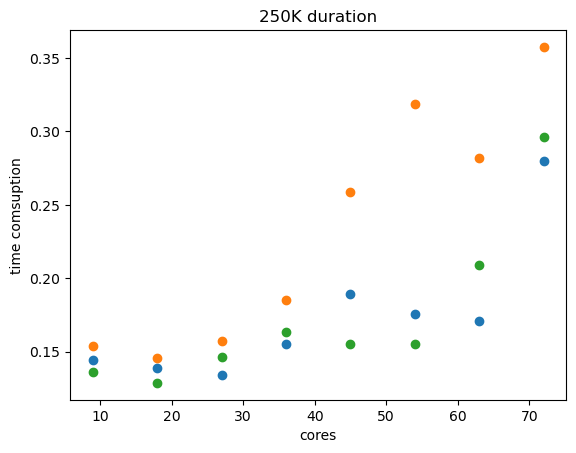

In [84]:
visualize_scaling(key, results_sep_3_250K_rep, title="250K")
visualize_scaling(key, results_sep_3_250K, title="250K")
visualize_scaling(key, results_sep_1_250K, title="250K")